In [4]:
import os
import sys
import requests
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import filters as skfilt

In [5]:
sys.path.append('/Users/mm40108/projects/datadays17/olfactory_protein_viz/src/')
from ecallen.ecallen import images as ecimg
from features.image_processing import read_images_in
from features.image_segmentation import get_pixels

DATA_DIR = "/Users/mm40108/projects/datadays17/olfactory_protein_viz/data"

In [7]:
# lets process images from one experiment
organism = 'DevMouse'
protein = 'Bmpr2'
experiment = '100042306'

# processed images
processed_dir = os.path.join(DATA_DIR, organism, protein, experiment, 'processed')
processed_imgs = read_images_in(processed_dir)
processed_imgs

read_images_in( /Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed ): /Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878599_processed.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878600_processed.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878601_processed.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878602_processed.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878635_processed.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878636_processed.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878637_processed.jpg
	/Users/mm40108/projects/datada

{'/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878599_processed.jpg': array([[  7,   7,   7, ...,  39,  55,  66],
        [  7,   7,   7, ...,  46,  67,  82],
        [  7,   7,   6, ...,  61,  88, 108],
        ...,
        [  8,   8,   8, ...,  13,  13,  13],
        [  9,   8,   8, ...,  13,  13,  13],
        [  9,   9,   7, ...,  13,  13,  13]], dtype=uint8),
 '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878600_processed.jpg': array([[  6,   7,   9, ...,  99, 115, 112],
        [  7,   8,  10, ...,  81,  98,  97],
        [  9,   9,  11, ...,  67,  87,  88],
        ...,
        [  9,   9,   9, ...,  43,  48,  65],
        [  9,   9,   9, ...,  40,  55,  83],
        [  9,   9,   9, ...,  40,  65, 104]], dtype=uint8),
 '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878601_processed.jpg': array([[ 9, 10, 10, ..., 48, 56

'100878637'

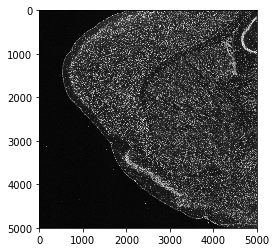

In [8]:
img_file = '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/processed/100878637_processed.jpg'
img = processed_imgs[img_file]
plt.imshow(img, cmap='gray')

image_id = img_file.split('/')[-1].split('.jpg')[0]
if '_' in image_id:
    image_id = image_id.split('_')
    if 'processed' in image_id:
        image_id.remove('processed')
image_id= image_id[0]
image_id

In [9]:
# http://api.brain-map.org/api/v2/image_to_reference/<image id>.json?x=<x pixel>&y=<y pixel>
im_base = "http://api.brain-map.org/api/v2/image_to_reference"
pix_c = lambda x_name, x_val: x_name + "=" + str(x_val)
x_pixel = 0
y_pixel = 0
im_c = "?" + "&".join([pix_c(k, v) for k, v in {"x":x_pixel, "y":y_pixel}.items()])
im_q = im_base + "/" + image_id + ".json" 
pix_q = im_q + im_c
print(im_q)
print(pix_q)

http://api.brain-map.org/api/v2/image_to_reference/100878637.json
http://api.brain-map.org/api/v2/image_to_reference/100878637.json?x=0&y=0


In [10]:
r = requests.get(im_q).json()
r

{'success': True,
 'id': 0,
 'start_row': 0,
 'num_rows': 0,
 'total_rows': 0,
 'msg': {'image_to_reference': {'x': 1808.7600743070004,
   'y': 267.5184164430001,
   'z': 2643.516397579048}}}

In [11]:
# get pixels
x, y, regionprops = get_pixels(img, min_neuron_pix=100) ## SLOW
print("x:", x, "\ny:", y)
print(regionprops)

x: [5.75, 19.253731343283583, 54.76844262295082, 83.94, 122.76729559748428, 160.19284802043424, 216.63587921847247, 306.93203883495147, 379.5389221556886, 393.3284671532847, 402.6746031746032, 472.2932098765432, 505.72222222222223, 518.0845481049563, 542.3272058823529, 641.4519230769231, 642.7993311036789, 666.5722543352601, 765.4038461538462, 786.1346153846154, 818.6165413533835, 829.5046728971963, 853.7413793103449, 948.6201550387597, 1066.2450980392157, 1080.490909090909, 1094.4094488188975, 1127.516339869281, 1284.3892617449665, 1315.8474576271187, 1336.2959501557632, 1337.1301369863013, 1370.7271062271063, 1431.4820143884892, 1452.9946808510638, 1479.4024390243903, 1497.622807017544, 1542.6206896551723, 1552.735294117647, 1700.2789115646258, 1701.5300261096606, 1755.1688311688313, 1805.7572815533981, 1845.32, 1882.7454545454545, 891.0530973451328, 897.5409836065573, 1123.1513353115727, 451.57805907172997, 753.3745928338762, 1813.3366336633662, 572.2454545454545, 8.522058823529411,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [24]:
regionprops[0].area
print(len(x), len(y))

12707 12707


[[1814.77624724 1828.76123343 1865.54972945 ... 2656.25010152
  5271.04445669 6061.00454092]
 [ 272.18717892  275.22756585  283.66931619 ... 5352.63747187
  5305.90175934 5291.77096233]
 [2643.67599768 2644.05506598 2645.05177368 ... 2661.42709545
  2732.93735945 2754.54146182]]


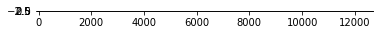

In [27]:
# 1. reorder the 2D images according to the correct anatomical order
# 2. scale 2D image
# 3. translate image
# rma query prototype for mapping a section image onto the CCF
# http://api.brain-map.org/api/v2/image_to_reference/<image id>.json?x=<x pixel>&y=<y pixel>
pir = ecimg.xy_to_pir(x, y, experiment, image_id)
print(pir)
plt.imshow(pir)
#plt.plot(x[0], y[0], 'b')

In [28]:
import numpy as np
import holoviews as hv
hv.extension('matplotlib')

ModuleNotFoundError: No module named 'holoviews'